In [1]:
library('tidyverse')
library('patchwork')
install.packages('nycflights13')
library('nycflights13')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Use filter to make a table with just flights weather data from January.

In [2]:
weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [3]:
january = weather %>%
    filter(month == 1)

Do the same for June.

In [4]:
june = weather %>%
    filter(month == 6)

Use filter and summarize to produce two single row tables. One that has the median temp for January, and one that has the median temp for June.

In [5]:
median.january  = weather %>% 
    filter(month == 1) %>% 
    summarize(median.temp = median(temp))

median.june  = weather %>% 
    filter(month == 6) %>% 
    summarize(median.temp = median(temp))

In [6]:
library('patchwork')

Warning message:
“Ignoring unknown aesthetics: y”
Warning message:
“Ignoring unknown aesthetics: y”


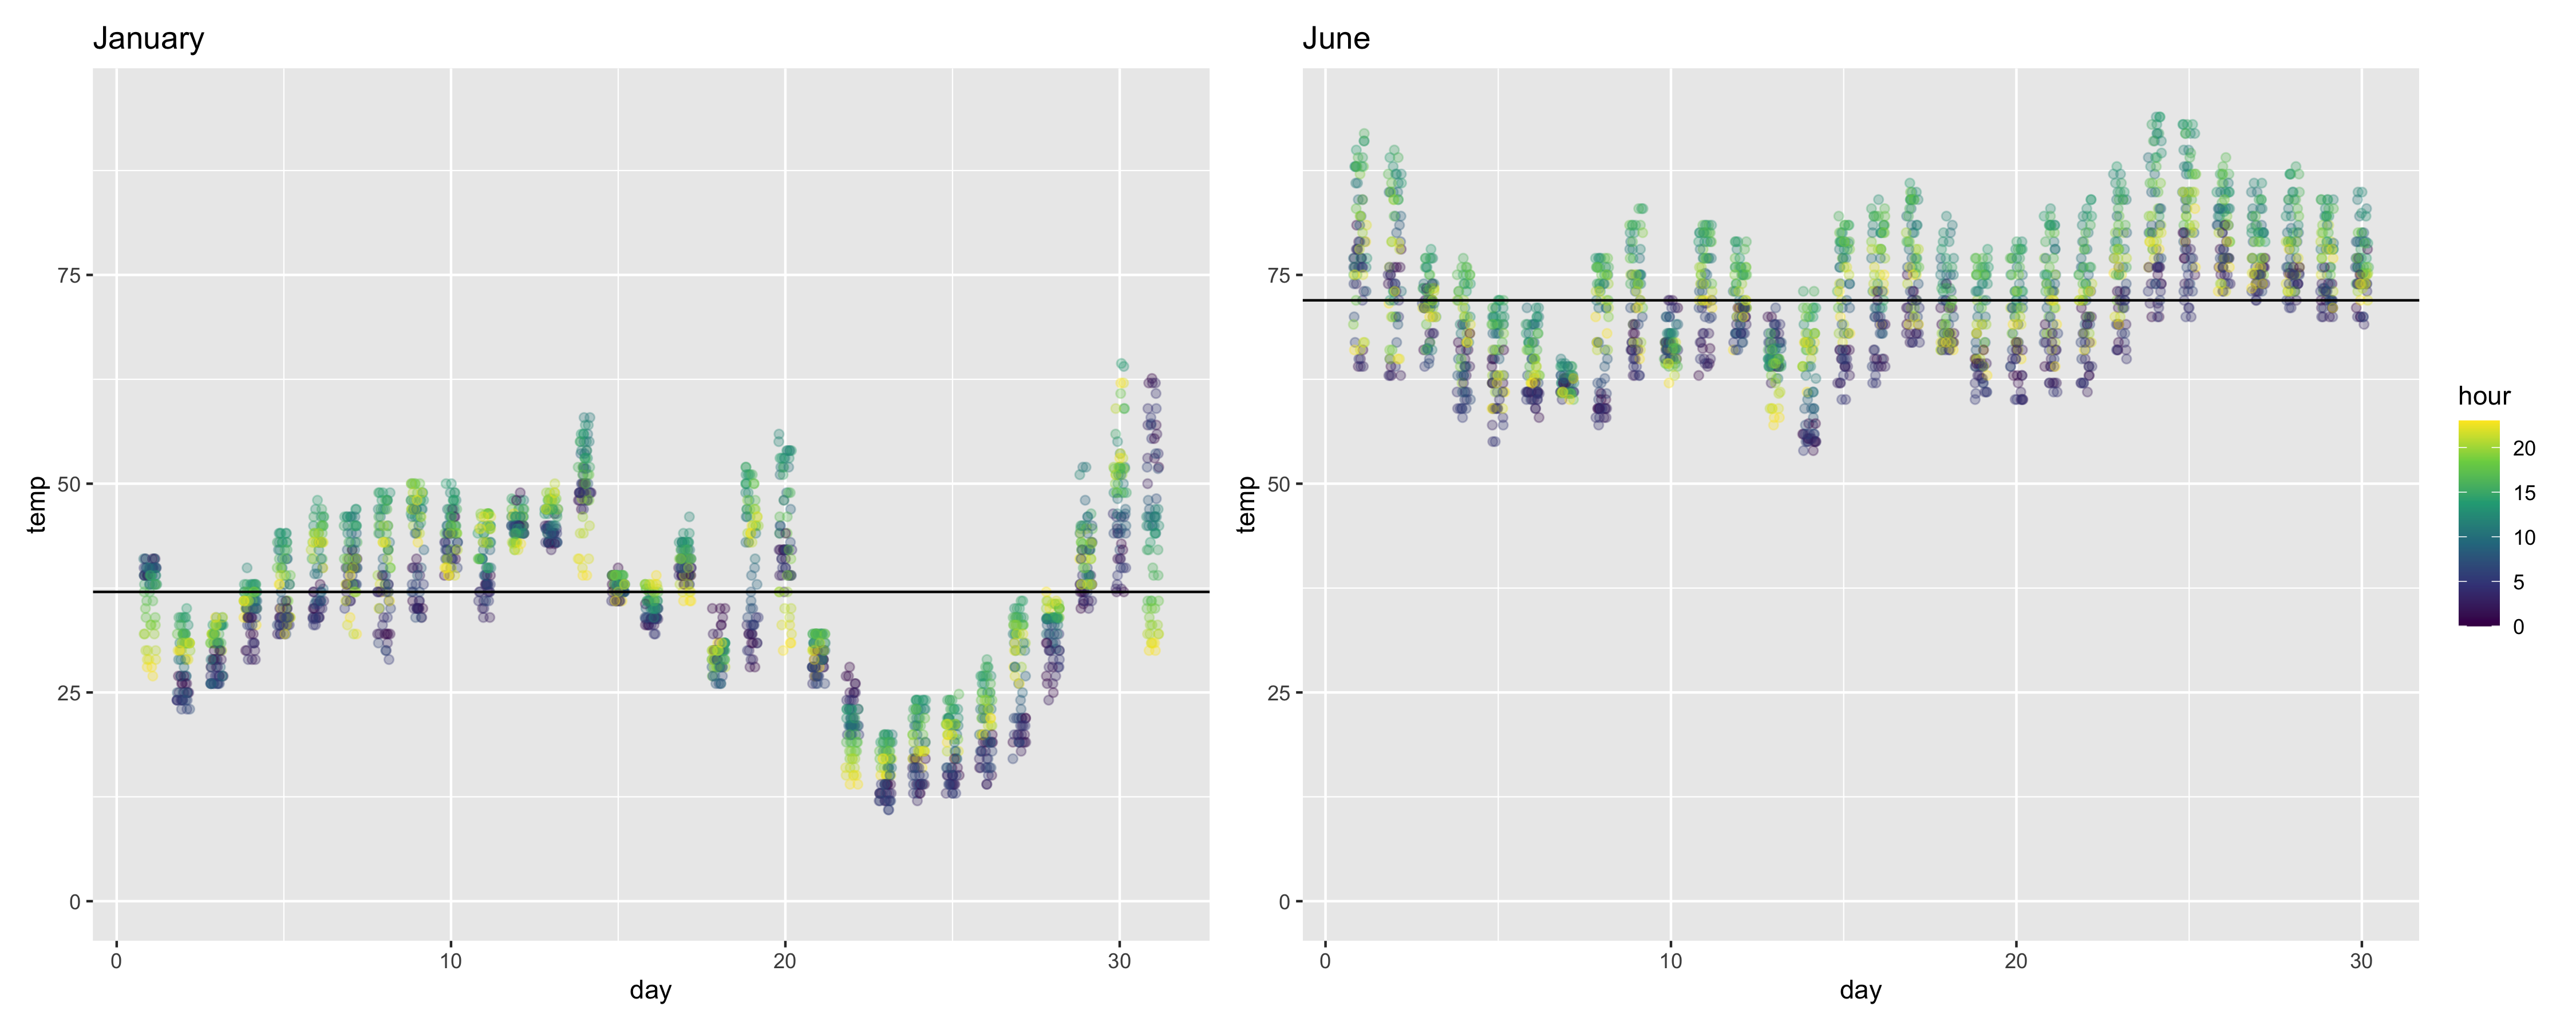

In [22]:
options(repr.plot.width = 15, repr.plot.height = 6,repr.plot.res = 300)
jan_plot = ggplot() + 
    geom_point(data = january, aes(x = day, y = temp, color = hour), position = position_jitter(h = 0, w = 0.2),
               alpha = 0.3) + 
    geom_hline(data = median.january, aes(y = median.temp, yintercept = median.temp)) +
    scale_color_viridis_c() + 
    theme(legend.position = 'none') + #only need 1 legend
    ylim(0,95) + 
    ggtitle('January')
june_plot = ggplot() + 
    geom_point(data = june, aes(x = day, y = temp, color = hour), position = position_jitter(h = 0, w = 0.2),
              alpha = 0.3) + 
    geom_hline(data = median.june, aes(y = median.temp, yintercept = median.temp)) +
    scale_color_viridis_c() + 
    ylim(0,95) +
    ggtitle('June')
jan_plot + june_plot

## Making same plot using facet_wrap

In [23]:
median.temperatures = weather %>%
    filter(month %in% c(1,6)) %>%
    group_by(month) %>%
    summarize(median.temp = median(temp))
median.temperatures

`summarise()` ungrouping output (override with `.groups` argument)



month,median.temp
<int>,<dbl>
1,37.04
6,71.96


Warning message:
“Ignoring unknown aesthetics: y”


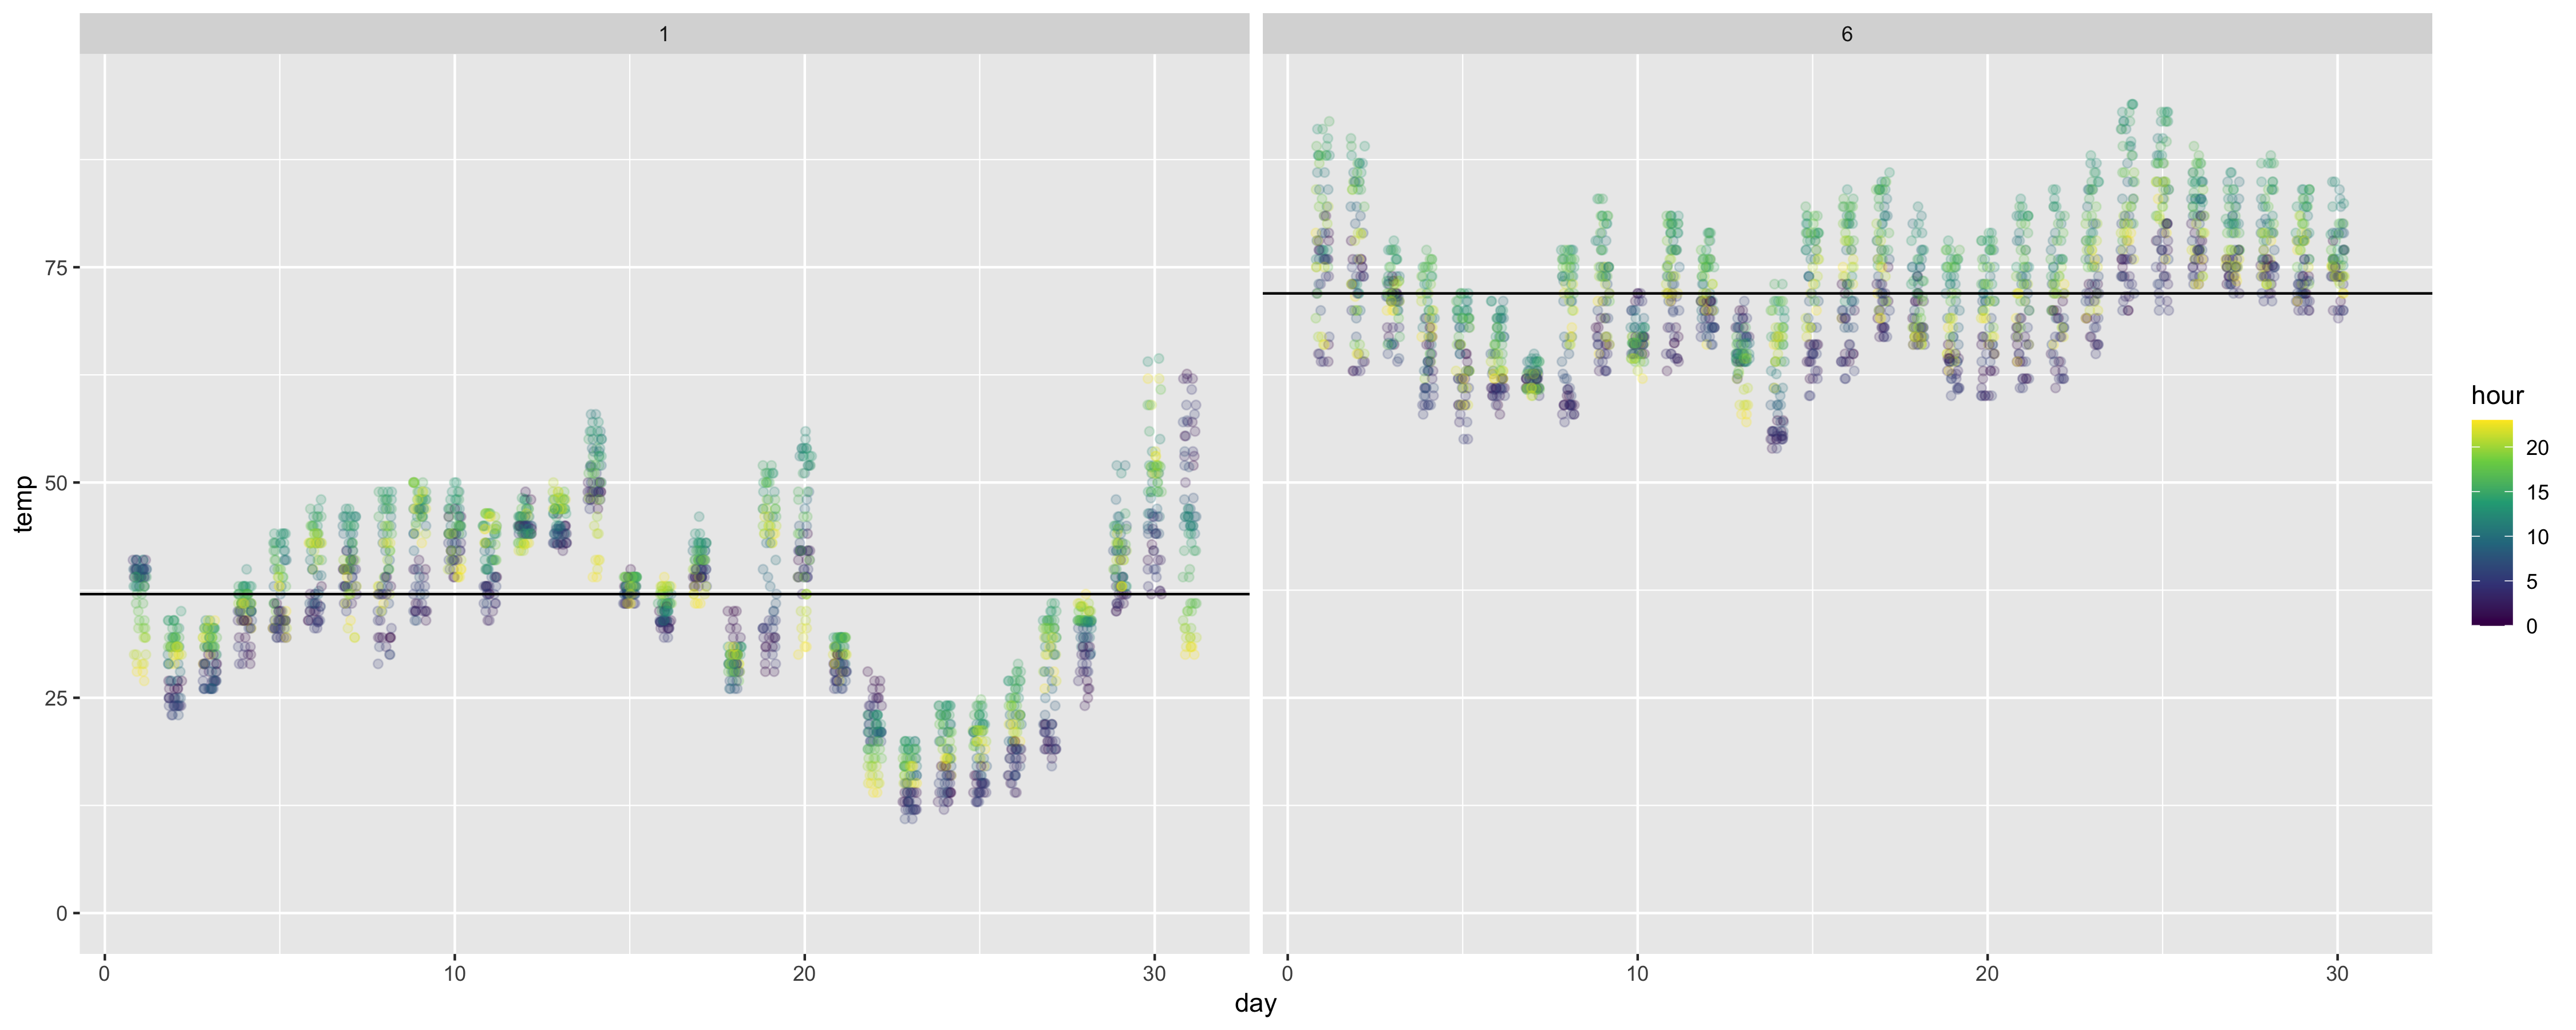

In [24]:
january_june_data = rbind(january,june)
ggplot(data = january_june_data) + 
  geom_point(aes(x = day, y = temp, color = hour), position = position_jitter(h = 0, w = 0.2),
          alpha = 0.2) + 
  geom_hline(data = median.temperatures, aes(y = median.temp, yintercept = median.temp)) +
  facet_wrap(~month) + 
  ylim(0,95) +
  scale_color_viridis_c() 